# **<center> Titanic - Data Preprocessing and Visualization </center>**

---

> + ***What is Data Preprocessing ?***
+ ***Why Data Preprocessing ?***
+ ***Major Tasks in Data Preprocessing***
+ ***Exploratory Data Analysis (EDA)***
+ ***Handling Missing Data***
+ ***Dealing with Categorical Values***
+ ***Rescaling***
+ ***Data Spliting***

### 1.   What is Data Preprocessing ?



Data preprocessing is a data mining technique that involves transforming **raw data** into an understandable format. 

### 2. Why Data Preprocessing ?

Data in the real world is dirty:
- **incomplete**: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
- **noisy**: containing errors or outliers
- **inconsistent**: containing discrepancies in codes or names

No quality data, no quality mining results:
- Quality decisions must be based on quality data
- Data warehouse needs consistent integration of quality data

### 3. Major Tasks in Data Preprocessing
- **Data cleaning**
 + Fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies
- **Data transformation**
 - Normalization or Standarization (scaling to a specific range)

## Lets get down to work

### 1. Let's upload our dataset first

In [0]:
from google.colab import files
uploaded = files.upload() #upload the dataset to google colab

Saving titanic.csv to titanic (1).csv


### 2. Importing the libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Import the dataset

In [0]:
df = pd.read_csv('/content/titanic.csv')

### 4. Exploratory Data Analysis (EDA)

In [0]:
# A quick look at the dataframe using head() function
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Our Attributes
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* gender - Gender
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In [0]:
#Now we see number of rows and columns using 'shape'
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns

In [0]:
# Use the DataFrame .describe() method to check out summary statistics of numeric columns .
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,864.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.304175
std,257.353842,0.486592,14.526497,1.102743,0.806057,50.304046
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.427100
75%,668.500000,1.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#And now we check the number of null values using 'isnull()' and 'sum()' functions
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            27
Cabin          687
Embarked         2
dtype: int64

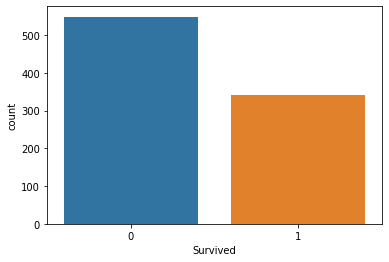

In [0]:
#Use seaborn to build a bar plot of Titanic survival (your target variable)
sns.countplot(data = df, x = 'Survived')

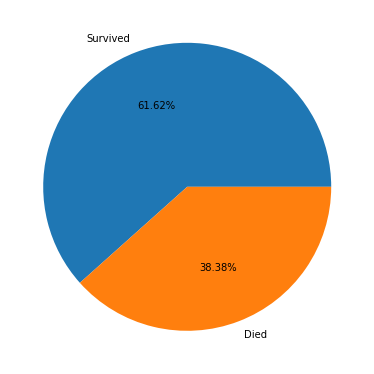

In [0]:
#Now we try a Pie chart
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Survived = df.Survived.value_counts() 
labels = ['Survived', 'Died']
ax.pie(Survived, labels = labels,autopct='%1.2f%%')
plt.show()

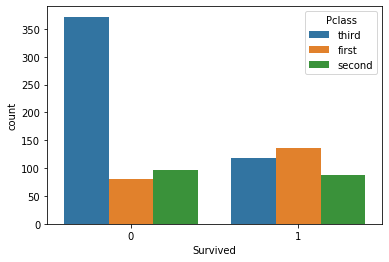

In [0]:
#Use seaborn to build bar plots to figure out which class has the most survivors.
sns.countplot(data = df, x ='Survived', hue ='Pclass')

In [0]:
# Use pandas to figure out how many women and how many men survived.
df[df.Survived == 1].groupby('Gender').Survived.count()

Gender
female    233
male      109
Name: Survived, dtype: int64

In [0]:
# Use pandas to figure out the proportion of women that survived, along with the proportion of men:
print('Survived Female  : ', df[df.Gender == 'female'].Survived.sum()/df[df.Gender == 'female'].Survived.count())
print('Survived Male : ', df[df.Gender == 'male'].Survived.sum()/df[df.Gender == 'male'].Survived.count())

Survived Female  :  0.7420382165605095
Survived Male :  0.18890814558058924


74% of women survived, while 18% of men survived.

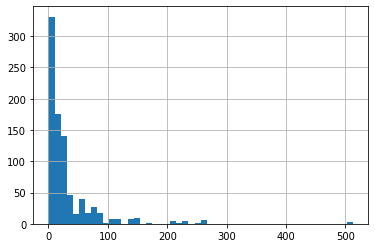

In [0]:
# plot a histogram of the 'Fare' column.
df.Fare.hist(bins=50)

## 5. Handling Missing Data

In [0]:
# Use the DataFrame .info() method to check out datatypes, missing values and more (of dataset).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           864 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


There are 2 numerical variables that have missing values: what are they?

The concept of missing values is important to understand in order to successfully manage data. If the missing values are not handled properly, then we may end up drawing an inaccurate inference about the data.

In [0]:
# Check for the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            27
Cabin          687
Embarked         2
dtype: int64

In [0]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **Two ways to handle Missing Values**
**1. Deleting Rows:** 
    
This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 75% of missing values. This method is advised only when there are enough samples in the data set. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

In [0]:
# Drop NAN values from dataset and save it to a new Dataframe 'dataset_1'
df1 = df.dropna()
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
# Print the shape of the new Dataframe 'df1'
df1.shape

(179, 12)

There are actually other parameters like 
* df.drop.na(thresh = n ) : delete rows with n null value
* df.drop.na(how = 'all' / 'any' ) : drop rows that have all/any missing values

In [0]:
# Drop the column 'Cabin' since this column has 687 missing values out of 891.
df1 = df.drop('Cabin', axis=1)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**2. Replacing With Mean/Median/Mode:**
This strategy can be applied on a feature which has numeric data like the age of a person.
We can calculate the mean, median or mode of the feature and replace it with the missing values.
The loss of the data can be negated by this method which yields better results compared to removal of rows and
columns.
Replacing with the above three approximations are a statistical approach of handling the missing values.

In [0]:
df.Fare.mode()

0    8.05
dtype: float64

In [0]:
df.Age.mean()

29.699117647058763

In [0]:
df.Fare.fillna(df.Fare.mode())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [0]:
# Replace the NaN value in each column with mean, media, or mode
dfcopy=df #Make a copy for later
df.Fare.fillna(df.Fare.mean(), inplace = True)
df.Age.fillna(df.Age.mean(), inplace=True)

In [0]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

We can use Interpolate also using df.Age.interpolate(), by default it is a linear interpolation

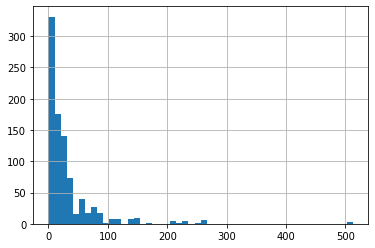

In [0]:
# Plot the histogram of 'Fare' to notice the changes.
df.Fare.hist(bins=50)

In [0]:
dfcopy.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Gender          0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare           27
Embarked        2
dtype: int64

In [0]:
dfcopy.Fare = dfcopy.Fare.interpolate()

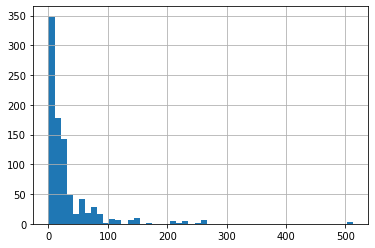

In [0]:
#We plot using Interpolation
dfcopy.Fare.hist(bins=50)

## 6. Dealing with Categorical Values

Categorical data are variables that contain label values rather than numeric values. 

---

Since, machine learning models are based on Mathematical equations and you can intuitively understand that it would cause some problem if we can keep the Categorical data in the equations because we would only want numbers in the equations.

---

This means that categorical data must be converted to a numerical form.

**Identifying Categorical Data: Nominal, Ordinal and Continuous**

+ Nominal features  are features where the categories are only labeled without any order of precedence. In this dataset, the feature 'Sex' is a nominal feature.

+ Ordinal features are features having some order associated with them. For example, a feature like Pclass, with three categories: first, second and third, which have an order associated with them.

+  Continuous features are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.


**Encoding Categorical Data**

The techniques that will be covered are the following:

+ Replacing values
+ Encoding labels
+ One-Hot encoding

In [0]:
#Replacing values :
# replacing the categories with the desired numbers. 
# This can be achieved with the help of the replace() function in pandas
replace_map  = {"Pclass": {"first":1, "second":2, "third":3}}
df.replace(replace_map, inplace= True)

In [0]:
#Label encoding :
# converting each value in a column to a number. Numerical labels are always between 0 and n_categories-1.
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [0]:
#We will write a function to do so :
def Gender (gender):
  gender = str(gender) #Now we convert values to String, to manipulate them
  if gender == "male" :
    return 0
  else:
    return 1

In [0]:
df.Gender = df.Gender.apply(Gender)

In [0]:
df.Gender.unique()

array([0, 1])

# 7. Rescaling

### **What is Feature Scaling ?**

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds.

### **Why Scaling?**

Most of the times, the dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

### **How to Scale Features**

There are four common methods to perform Feature Scaling.

**1. Standardisation:**

Standardisation replaces the values by their Z scores.

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*LysCPCvg0AzQenGoarL_hQ.png)


This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.

**2. Mean Normalisation:**

![Texte alternatif…](https://cdn-images-1.medium.com/max/2000/1*fyK4gMQrfJKV5pmbXSrNbg.png)


This distribution will have values between -1 and 1with μ=0.

Standardisation and Mean Normalization can be used for algorithms that assumes zero centric data like Principal Component Analysis(PCA).

**3. Min-Max Scaling:**

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*19hq_t_NFQ6YVxMxsT0Cqg.png)


This scaling brings the value between 0 and 1.

**4. Unit Vector:**


![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*u2Up0eaer56dpmaElU3Zxw.png)


Scaling is done considering the whole feature vecture to be of unit length.

Min-Max Scaling and Unit Vector techniques produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.





In [0]:
#Feature Scaling : 

from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()

# We need to fit and transform the dataset
dfScale = Sc.fit_transform(df[['Age','Fare']])

dfScale[:10]

array([[-0.5924806 , -0.50607007],
       [ 0.63878901,  0.78734055],
       [-0.2846632 , -0.49243572],
       [ 0.40792596,  0.42005551],
       [ 0.40792596, -0.48991084],
       [ 0.        , -0.48166358],
       [ 1.87005862,  0.3950592 ],
       [-2.13156761, -0.22681846],
       [-0.20770885, -0.42763117],
       [-1.20811541, -0.04511202]])

In [0]:
#Weput our values in the dataset
df[['Age','Fare']] = dfScale

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,0,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.497841,S
1,2,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.791465,C
2,3,1,0,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.484250,S
3,4,1,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.425345,S
4,5,0,0,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.481733,S


#### Now we drop columns that seems useless for prediction that are : PassengerId, Name, Ticket and Embarked


In [0]:
dfClean = df.drop(['PassengerId', 'Name', 'Ticket' , 'Embarked'],axis = 1)

In [0]:
#Quick Diplay
dfClean.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,0,-0.592481,1,0,-0.506070
1,1,1,1,0.638789,1,0,0.787341
2,1,3,1,-0.284663,0,0,-0.492436
3,1,1,1,0.407926,1,0,0.420056
4,0,3,0,0.407926,0,0,-0.489911


# 8. **Data Spliting**


In any Machine Learning model is that we’re going to split data-set into two separate sets

#### 1. Training Set

#### 2. Test Set

### Why we need splitting ?

Well here it’s your algorithm model that is going to learn from your data to make predictions. Generally we split the data-set into 70:30 ratio or 80:20 what does it mean, 70 percent data take in train and 30 percent data take in test. However, this Splitting can be varies according to the data-set shape and size.



In [0]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
#Features
X = dfClean.drop('Survived', axis=1)

#Target
Y = dfClean['Survived']

In [0]:
# Print the X
X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
0,3,0,-0.592481,1,0,-0.506070
1,1,1,0.638789,1,0,0.787341
2,3,1,-0.284663,0,0,-0.492436
3,1,1,0.407926,1,0,0.420056
4,3,0,0.407926,0,0,-0.489911


In [0]:
# Print the Y
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
# The test size is taken as 20% of the total dataset i.e., out of 15 only 3 rows are taken as test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

### Lets start the 'AI' Part

In [0]:
#First we will try with 50 decision tree, and a Max depth of 5
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10)
#Here we train our model
model.fit(x_train, y_train)
#And finally, we use the model , and store them on predict variable
predict=model.predict(x_test)

In [0]:
#Now we test the accuracy of our model
from sklearn.metrics import accuracy_score

In [0]:
print(accuracy_score(y_test,predict))

0.7932960893854749


In [0]:
from xgboost import XGBClassifier

In [0]:
model2 = XGBClassifier(n_estimators=100,max_depth=10)
#Here we train our model
model2.fit(x_train, y_train)
#And finally, we use the model , and store them on predict2 variable
predict2=model2.predict(x_test)

In [0]:
print(accuracy_score(y_test,predict2))

0.8044692737430168


In [0]:
#Single line prediction
X.iloc[[0]]

,Pclass,Gender,Age,SibSp,Parch,Fare
0,3,0,-0.592481,1,0,-0.50607


In [0]:
model.predict(X.iloc[[0]])

array([0])

### A final Step, is to save our model for future use

In [0]:
from sklearn.externals import joblib

In [0]:
joblib.dump(model, "/content/model.pkl")

['/content/model.pkl']

In [0]:
# Load model from file
classifer = joblib.load("/content/model.pkl")

In [0]:
predict=classifer.predict(x_test)

In [0]:
print(accuracy_score(y_test,predict2))

0.8044692737430168
